# Introduction: A Long-only Strategy based on Price & Volume Data

## Getting the data

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [96]:
data = pd.read_csv("btc_data.csv", parse_dates = ["Date"], index_col = "Date")
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2023-12-30 18:00:00,42411.11,790.866750
2023-12-30 19:00:00,42361.13,741.062640
2023-12-30 20:00:00,42283.95,797.193820


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55715 entries, 2017-08-17 04:00:00 to 2023-12-30 22:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   55715 non-null  float64
 1   Volume  55715 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [98]:
data = data[["Close", "Volume"]].copy()

In [99]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2023-12-30 18:00:00,42411.11,790.866750
2023-12-30 19:00:00,42361.13,741.062640
2023-12-30 20:00:00,42283.95,797.193820


## Financial Data Analysis / Visual Inspection

In [100]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2023-12-30 18:00:00,42411.11,790.866750
2023-12-30 19:00:00,42361.13,741.062640
2023-12-30 20:00:00,42283.95,797.193820


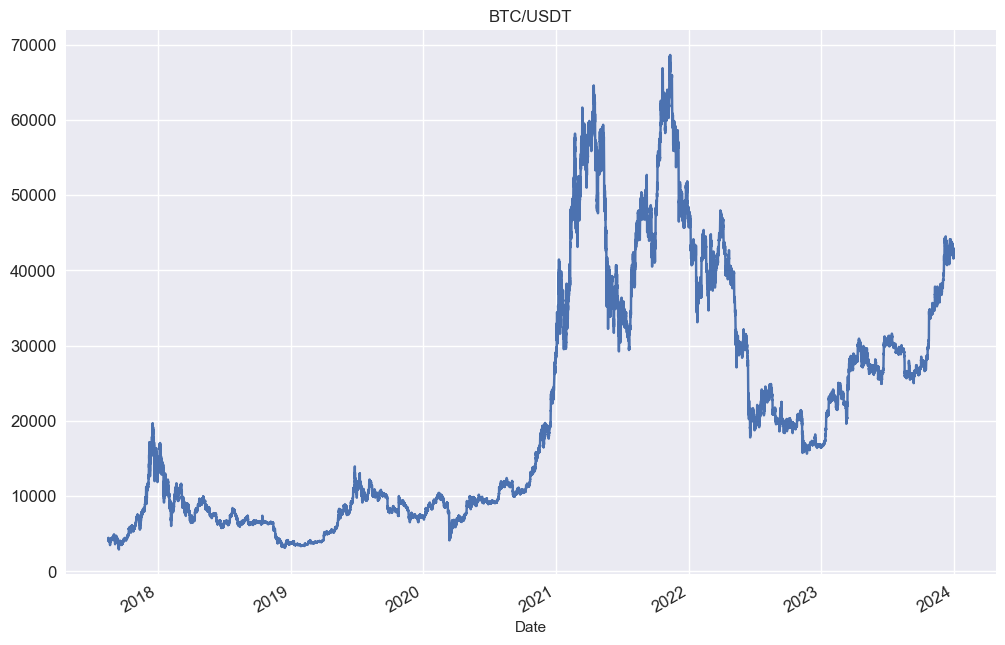

In [101]:
data.Close.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

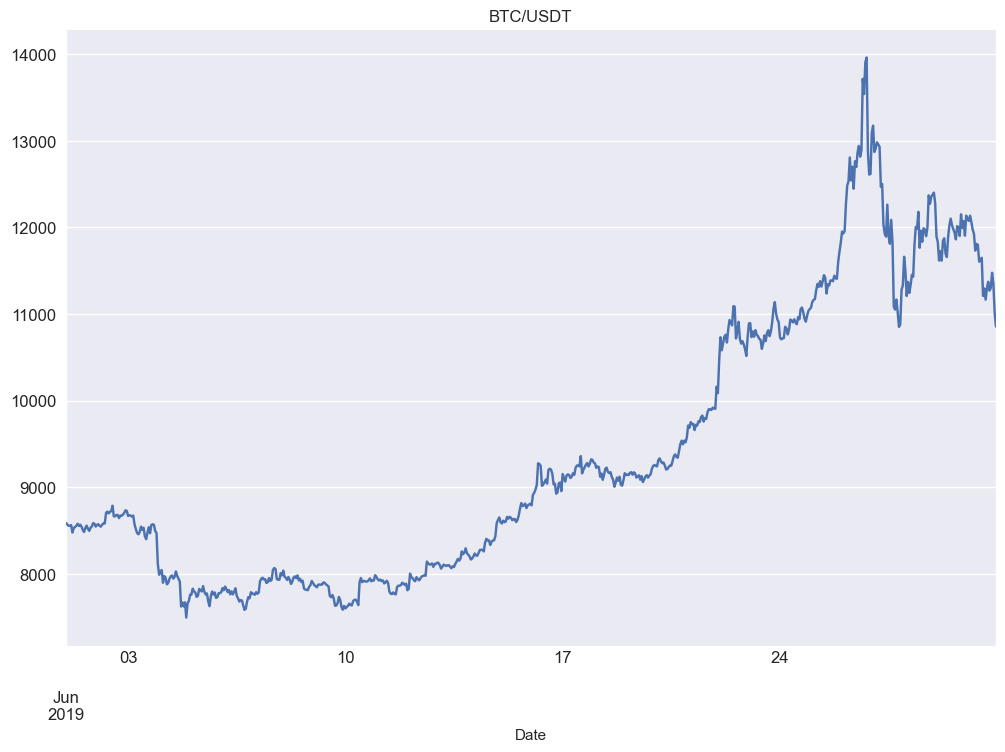

In [102]:
data.Close.loc["2019-06"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

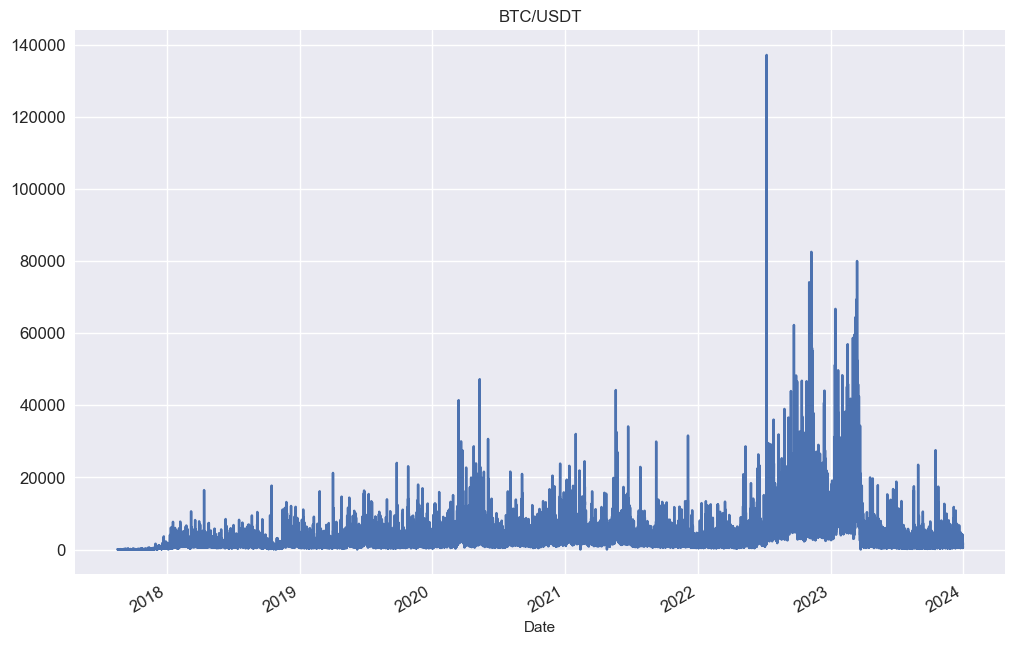

In [103]:
data.Volume.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

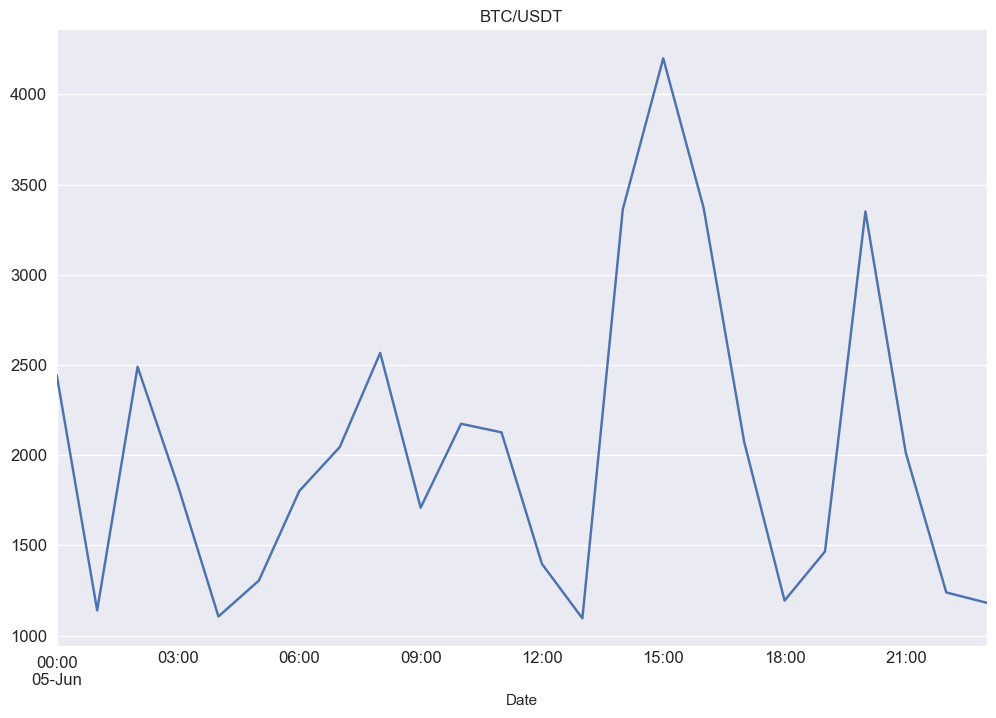

In [104]:
data.Volume.loc["2019-06-05"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

In [105]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [106]:
data.describe()

,Close,Volume,returns
count,55715.000000,55715.000000,55714.000000
mean,20898.976866,3060.588844,0.000041
std,15907.106248,4341.220599,0.008538
min,2919.000000,0.000000,-0.201033
25%,7933.500000,962.233038,-0.002640
50%,15465.830000,1682.426251,0.000088
75%,30429.995000,3289.242270,0.002812
max,68633.690000,137207.188600,0.160280


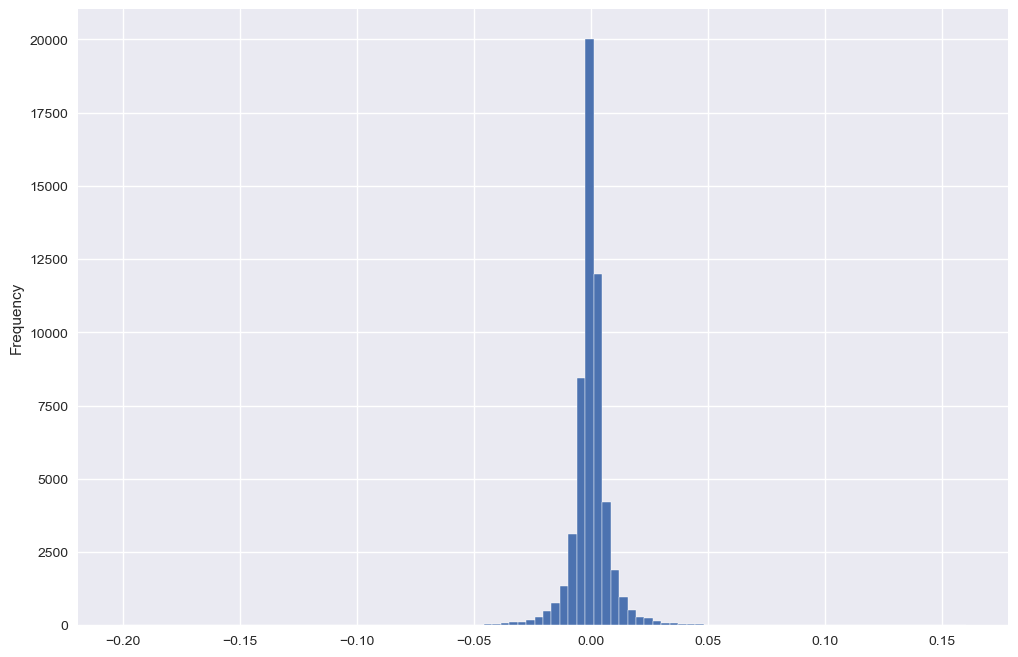

In [107]:
data.returns.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [108]:
data.returns.nlargest(10)

Date
2020-03-13 02:00:00    0.160280
2017-09-15 12:00:00    0.131731
2020-03-15 21:00:00    0.129546
2017-09-15 14:00:00    0.117777
2021-01-29 08:00:00    0.116145
2017-09-05 02:00:00    0.113257
2018-01-17 16:00:00    0.108790
2018-04-12 11:00:00    0.103325
2018-10-15 06:00:00    0.100727
2019-07-18 14:00:00    0.089576
Name: returns, dtype: float64

In [109]:
data.returns.nsmallest(10)

Date
2020-03-12 10:00:00   -0.201033
2020-03-12 23:00:00   -0.189707
2020-03-13 01:00:00   -0.119449
2017-12-28 02:00:00   -0.108097
2017-12-22 13:00:00   -0.107858
2017-09-05 01:00:00   -0.099818
2017-08-22 04:00:00   -0.098295
2020-03-15 22:00:00   -0.095180
2021-05-19 12:00:00   -0.093810
2019-09-24 18:00:00   -0.093730
Name: returns, dtype: float64

## A simple Buy and Hold "Strategy"

Assumption: Invest 1 USD(T) in BTC on 2017-08-17 and hold until 2021-10-07 (no further trades).

In [110]:
data

,Close,Volume,returns
Date,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457
...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835
2023-12-30 19:00:00,42361.13,741.062640,-0.001179
2023-12-30 20:00:00,42283.95,797.193820,-0.001824


In [111]:
data.Close / data.Close[0]

C:\Users\matei\AppData\Local\Temp\ipykernel_28428\3104999750.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.Close / data.Close[0]


Date
2017-08-17 04:00:00    1.000000
2017-08-17 05:00:00    1.001506
2017-08-17 06:00:00    1.003602
2017-08-17 07:00:00    1.009552
2017-08-17 08:00:00    1.012036
                         ...   
2023-12-30 18:00:00    9.842837
2023-12-30 19:00:00    9.831237
2023-12-30 20:00:00    9.813325
2023-12-30 21:00:00    9.818229
2023-12-30 22:00:00    9.799252
Name: Close, Length: 55715, dtype: float64

In [112]:
data.returns.sum()

2.282306032663924

In [113]:
multiple = np.exp(data.returns.sum())
multiple

9.799251769041707

In [114]:
data["creturns"] = data.returns.cumsum().apply(np.exp) # Normalized Prices with Base Value 1

In [115]:
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325


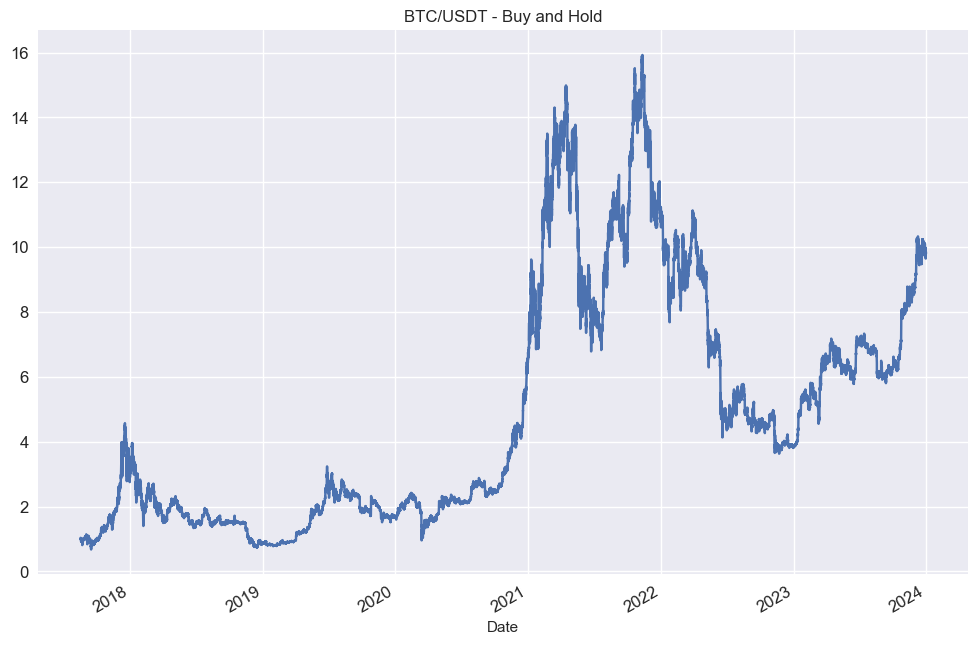

In [116]:
data.creturns.plot(figsize = (12, 8), title = "BTC/USDT - Buy and Hold", fontsize = 12)
plt.show()

## Performance Measurement

In [117]:
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325


__mean return and risk__

In [118]:
mu = data.returns.mean()
mu

4.096467732821058e-05

In [119]:
std = data.returns.std()
std

0.008538432132621808

__annualized mean return and risk__

In [120]:
number_of_periods = 24 * 365.25
number_of_periods

8766.0

In [121]:
ann_mean = mu * number_of_periods
ann_mean

0.3590963614590939

In [122]:
ann_std = std * np.sqrt(number_of_periods)
ann_std

0.7994270954265839

__CAGR__

In [123]:
cagr = np.exp(ann_mean) - 1
cagr

0.43203478788490446

__Risk-adjusted Return__ ("Sharpe Ratio")

In [124]:
ann_mean / ann_std

0.449192132107401

In [125]:
cagr / ann_std

0.5404305037401385

## Preparing the Data for the Trading Strategy

In [126]:
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325


__Adding the Feature "Change in Trading Volume (log)"__

In [127]:
data["vol_ch"] = np.log(data.Volume.div(data.Volume.shift(1)))
data

C:\Users\matei\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013


__Data Cleaning (removing outliers)__

In [128]:
data.vol_ch.nsmallest(20)

Date
2017-09-06 16:00:00        -inf
2019-06-07 21:00:00        -inf
2021-02-11 03:00:00        -inf
2023-03-24 12:00:00        -inf
2021-04-25 04:00:00   -5.644090
2018-01-04 03:00:00   -5.428025
2019-06-07 20:00:00   -4.780619
2017-08-19 23:00:00   -3.801014
2017-08-20 09:00:00   -3.782857
2017-08-26 04:00:00   -3.470297
2017-12-04 06:00:00   -3.178488
2017-09-24 21:00:00   -2.749294
2017-08-21 09:00:00   -2.643555
2017-08-19 19:00:00   -2.357538
2020-06-09 01:00:00   -2.157645
2017-08-20 03:00:00   -2.106886
2018-10-06 03:00:00   -2.072737
2017-09-12 20:00:00   -1.948525
2019-10-13 21:00:00   -1.905406
2017-10-07 04:00:00   -1.901772
Name: vol_ch, dtype: float64

In [129]:
data.vol_ch.nlargest(20)

Date
2017-09-06 23:00:00         inf
2019-06-07 22:00:00         inf
2021-02-11 05:00:00         inf
2023-03-24 14:00:00         inf
2018-01-04 05:00:00    5.256246
2021-04-25 08:00:00    5.051831
2017-08-20 00:00:00    3.794985
2017-08-26 05:00:00    3.428566
2023-08-29 14:00:00    3.240614
2023-10-01 22:00:00    3.058111
2022-03-27 20:00:00    2.949728
2017-08-20 11:00:00    2.904046
2017-10-12 00:00:00    2.884007
2017-12-04 07:00:00    2.851238
2019-07-27 10:00:00    2.808519
2017-08-20 15:00:00    2.779948
2022-07-08 14:00:00    2.674620
2019-12-16 18:00:00    2.658757
2023-10-16 13:00:00    2.634433
2017-08-20 05:00:00    2.585916
Name: vol_ch, dtype: float64

In [130]:
data.loc[data.vol_ch > 4, "vol_ch"] = np.nan
data.loc[data.vol_ch < -4, "vol_ch"] = np.nan

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55715 entries, 2017-08-17 04:00:00 to 2023-12-30 22:00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     55715 non-null  float64
 1   Volume    55715 non-null  float64
 2   returns   55714 non-null  float64
 3   creturns  55714 non-null  float64
 4   vol_ch    55701 non-null  float64
dtypes: float64(5)
memory usage: 4.6 MB


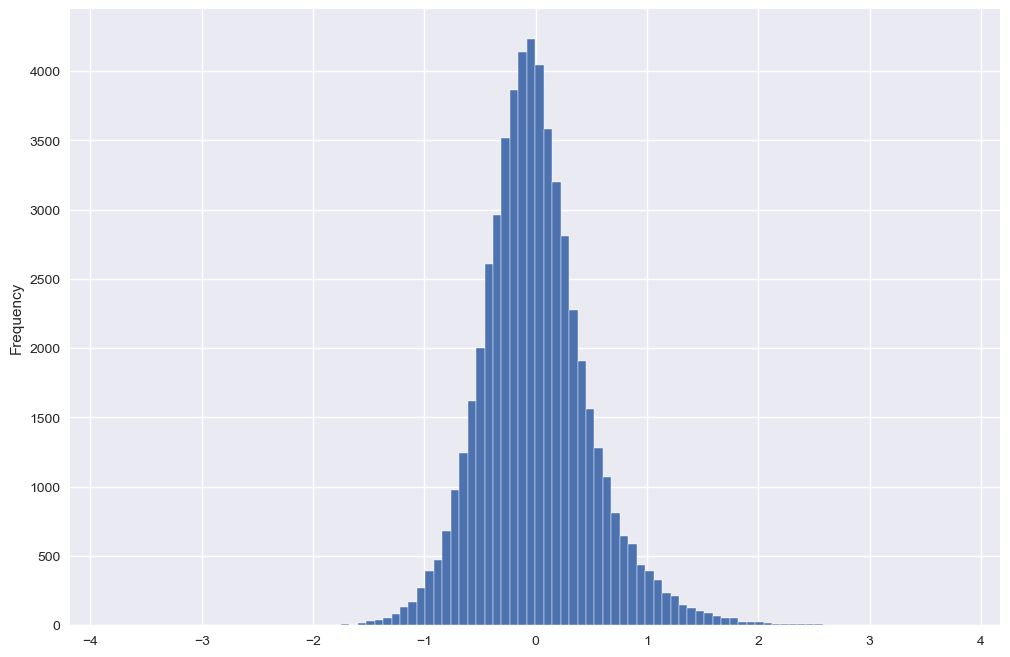

In [132]:
data.vol_ch.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [133]:
data

,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013


## Explanatory Data Analysis: Financial Returns and Trading Volume (1)

__Question 1: Is there a relationship between price changes and volume changes?__ <br>
(e.g. rapid Increase in Trading Volume triggers extreme Price changes) 

In [134]:
data

,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013


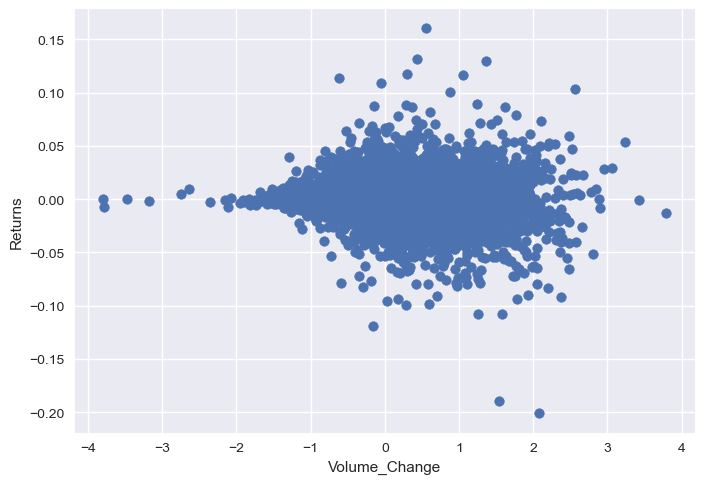

In [135]:
plt.scatter(x = data.vol_ch, y = data.returns)
plt.xlabel("Volume_Change")
plt.ylabel("Returns")
plt.show()

Discretize columns returns and vol_ch: Sort and reorganize each in 10 equal sized buckets

In [136]:
pd.qcut(data.returns, q = 10)

Date
2017-08-17 04:00:00                      NaN
2017-08-17 05:00:00      (0.000998, 0.00209]
2017-08-17 06:00:00       (0.00209, 0.00377]
2017-08-17 07:00:00       (0.00377, 0.00705]
2017-08-17 08:00:00       (0.00209, 0.00377]
                               ...          
2023-12-30 18:00:00    (-0.00192, -0.000847]
2023-12-30 19:00:00    (-0.00192, -0.000847]
2023-12-30 20:00:00    (-0.00192, -0.000847]
2023-12-30 21:00:00     (8.76e-05, 0.000998]
2023-12-30 22:00:00     (-0.00352, -0.00192]
Name: returns, Length: 55715, dtype: category
Categories (10, interval[float64, right]): [(-0.202, -0.00688] < (-0.00688, -0.00352] < (-0.00352, -0.00192] < (-0.00192, -0.000847] ... (0.000998, 0.00209] < (0.00209, 0.00377] < (0.00377, 0.00705] < (0.00705, 0.16]]

In [137]:
data["ret_cat"] = pd.qcut(data.returns, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

In [138]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat
Date,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3
...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2


In [139]:
data.ret_cat.value_counts()

ret_cat
-5    5572
-2    5572
2     5572
5     5572
-4    5571
-3    5571
-1    5571
1     5571
3     5571
4     5571
Name: count, dtype: int64

In [140]:
data["vol_cat"] = pd.qcut(data.vol_ch, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

In [141]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2


In [142]:
matrix = pd.crosstab(data.vol_cat, data.ret_cat)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,233,493,554,619,661,701,715,685,563,347
-4,317,471,614,618,676,669,680,603,554,368
-3,312,483,622,683,672,680,640,601,526,351
-2,353,515,611,679,644,696,648,557,487,380
-1,340,502,641,641,661,666,602,580,509,428
1,425,590,593,618,613,619,566,570,515,461
2,500,594,540,566,580,573,554,579,588,496
3,609,593,573,512,512,470,531,573,587,610
4,875,719,483,430,388,327,399,497,691,761


In [143]:
import seaborn as sns

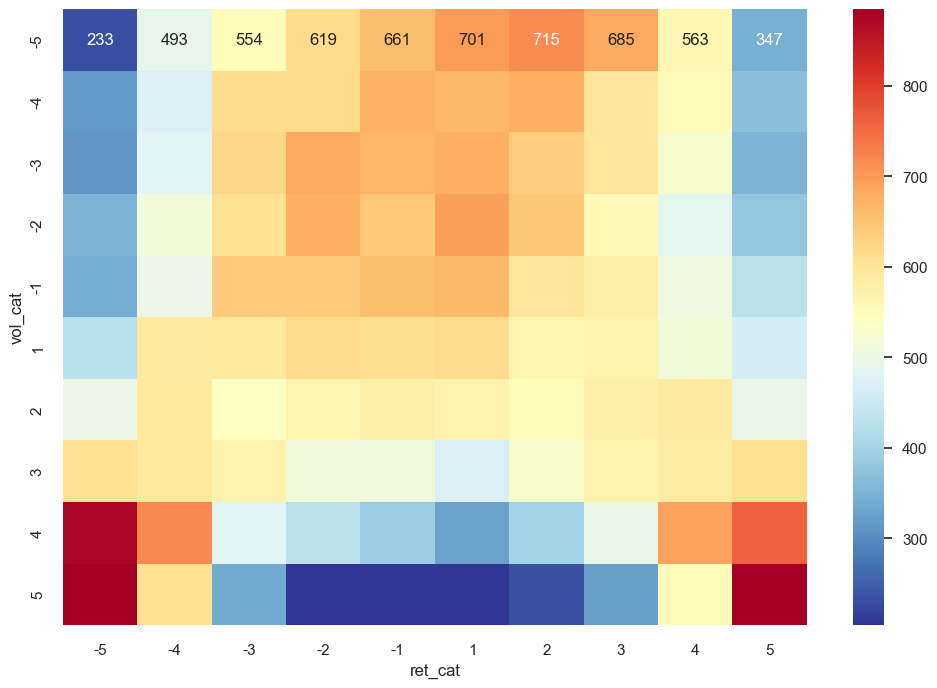

In [144]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap = "RdYlBu_r", annot = True, robust = True, fmt = ".0f")
plt.show()

__-> Extreme increases in Trading Volume trigger extreme (positive and negative) returns.__ <br>
__-> Low to moderate changes in the Trading Volume occur frequently with low to moderate returns__.

## Explanatory Data Analysis: Financial Returns and Trading Volume (2)

Question 2: Can we use return/vol_ch clusters to (partly) forecast future returns? <br>
(e.g. Cluster 5/5 is a strong momentum signal -> prices will further rise in the near future) 

In [145]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2


In [146]:
data.vol_cat.shift()

Date
2017-08-17 04:00:00    NaN
2017-08-17 05:00:00    NaN
2017-08-17 06:00:00     -5
2017-08-17 07:00:00     -5
2017-08-17 08:00:00     -4
                      ... 
2023-12-30 18:00:00     -1
2023-12-30 19:00:00     -5
2023-12-30 20:00:00     -1
2023-12-30 21:00:00      2
2023-12-30 22:00:00     -1
Name: vol_cat, Length: 55715, dtype: category
Categories (10, int64): [-5 < -4 < -3 < -2 ... 2 < 3 < 4 < 5]

In [147]:
matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(),
                     values = data.returns, aggfunc = np.mean)
matrix

C:\Users\matei\AppData\Local\Temp\ipykernel_28428\3113069884.py:1: FutureWarning: The provided callable <function mean at 0x0000022B243A8CA0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(),


ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,0.003092,0.000453,-0.000265,0.000118,-0.000152,0.000125,-0.000357,0.000111,-0.000491,0.000076
-4,0.002154,-0.000474,0.000021,0.000314,0.000061,0.000194,-0.000114,0.000018,-0.000586,-0.002825
-3,0.000108,0.000809,-0.000224,-0.000302,-0.000126,0.000275,-0.000168,0.000030,0.000685,-0.000569
-2,0.002079,0.000474,-0.000228,0.000094,0.000076,-0.000264,-0.000600,-0.000067,-0.000283,-0.000481
-1,-0.000370,0.000913,0.000658,-0.000054,-0.000333,0.000124,-0.000263,-0.000540,-0.000049,-0.000429
1,0.000675,-0.000266,0.000590,-0.000011,-0.000002,-0.000042,-0.000291,-0.000089,0.000003,-0.000245
2,0.000490,-0.000097,0.000372,0.000490,-0.000328,0.000184,0.000095,0.000132,-0.000343,0.000085
3,0.001257,-0.000048,0.000224,-0.000322,-0.000403,-0.000272,0.000258,0.000282,-0.000476,0.000937
4,0.000428,0.000183,-0.000195,0.000207,0.000108,-0.000140,-0.000454,0.000007,0.000398,-0.000638


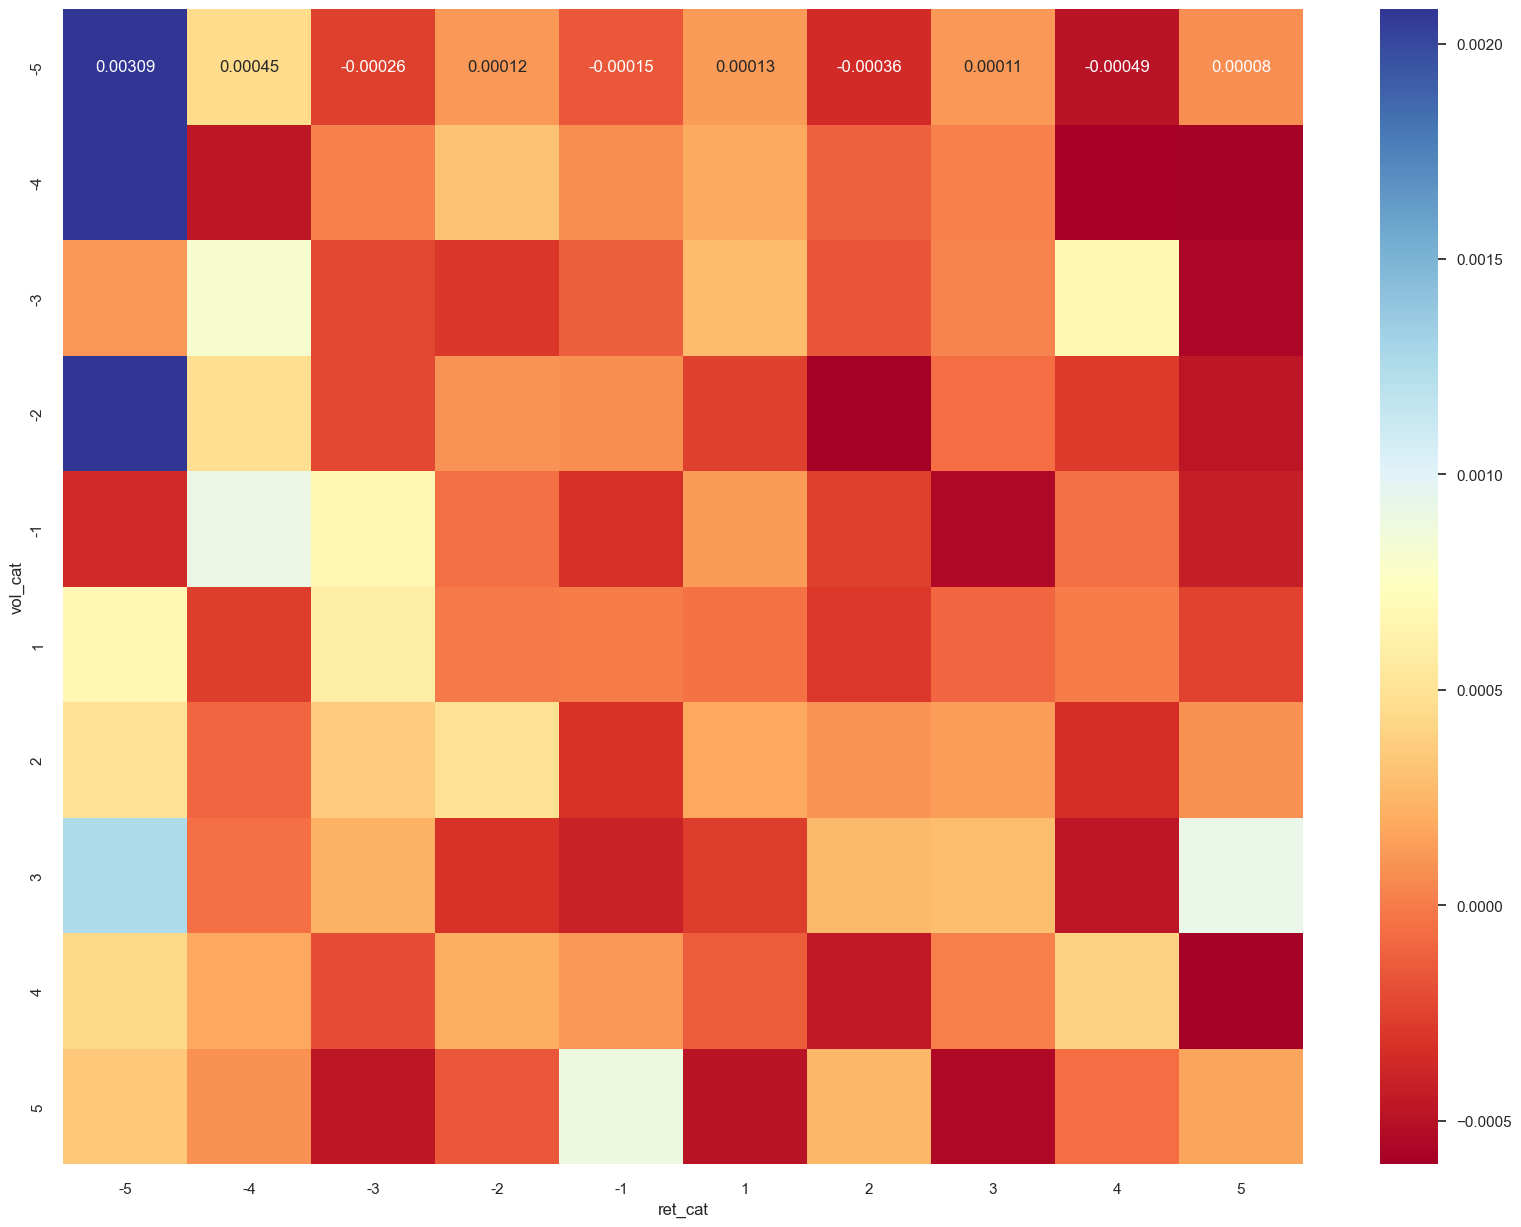

In [189]:
plt.figure(figsize=(20, 15))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap = "RdYlBu", annot = True, robust = True, fmt = ".5f")
plt.show()

__-> Extremely High (positive) returns and Decreases in Volume is a Contrarian (mean-reverting) signal -> prices will fall.__ <br>
__-> Extremely Low (negative) returns and Decreases in Volume is a Contrarian (mean-reverting) signal -> prices will rise.__

## Formulating a Long-only Price/Volume Trading Strategy

__Plan__: Make Use of the _"Extremely High (positive) returns and Decreases in Volume"_ Cluster (falling prices):

__Implementation__: 
- Buy BTC/USDT in the Spot market and hold...
- ...until there is a signal to sell -> sell and go neutral.
- Buy back when the signal to sell has disappeared.

In [149]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2


In [150]:
data["position"] = 1 # Trading position -> long(1) for all bars: Buy-and-Hold
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1


Sell and go Neutral (position = 0) if returns are very high (cond1) and vol_ch is negative (cond2)

In [151]:
# getting returns threshold for very high returns (>= 90th percentile)
return_thresh = np.percentile(data.returns.dropna(), 90)
return_thresh

0.007045856596361843

In [152]:
cond1 = data.returns >= return_thresh
cond1

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00    False
2017-08-17 06:00:00    False
2017-08-17 07:00:00    False
2017-08-17 08:00:00    False
                       ...  
2023-12-30 18:00:00    False
2023-12-30 19:00:00    False
2023-12-30 20:00:00    False
2023-12-30 21:00:00    False
2023-12-30 22:00:00    False
Name: returns, Length: 55715, dtype: bool

In [153]:
# getting vol_ch thresholds for (moderate) Volume Decreases (between 5th and 20th percentile)
volume_thresh = np.percentile(data.vol_ch.dropna(), [5, 20])
volume_thresh

array([-0.72802012, -0.37337145])

In [154]:
cond2 = data.vol_ch.between(volume_thresh[0], volume_thresh[1])
cond2

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00     True
2017-08-17 06:00:00    False
2017-08-17 07:00:00     True
2017-08-17 08:00:00    False
                       ...  
2023-12-30 18:00:00    False
2023-12-30 19:00:00    False
2023-12-30 20:00:00    False
2023-12-30 21:00:00    False
2023-12-30 22:00:00     True
Name: vol_ch, Length: 55715, dtype: bool

In [155]:
data.loc[cond1 & cond2, "position"] = 0

In [156]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1


In [157]:
data.position.value_counts()

position
1    55174
0      541
Name: count, dtype: int64

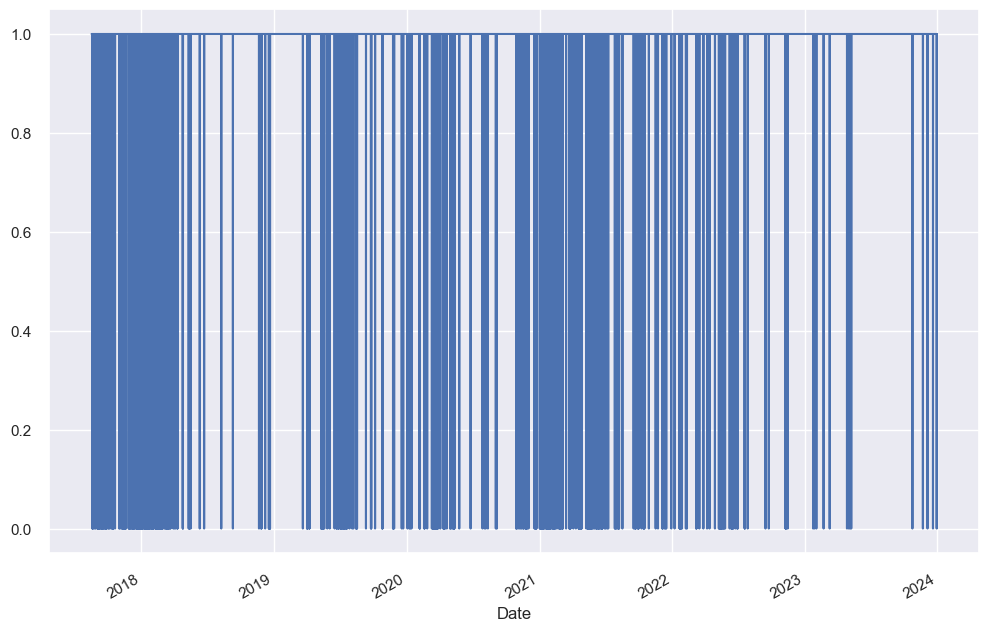

In [158]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

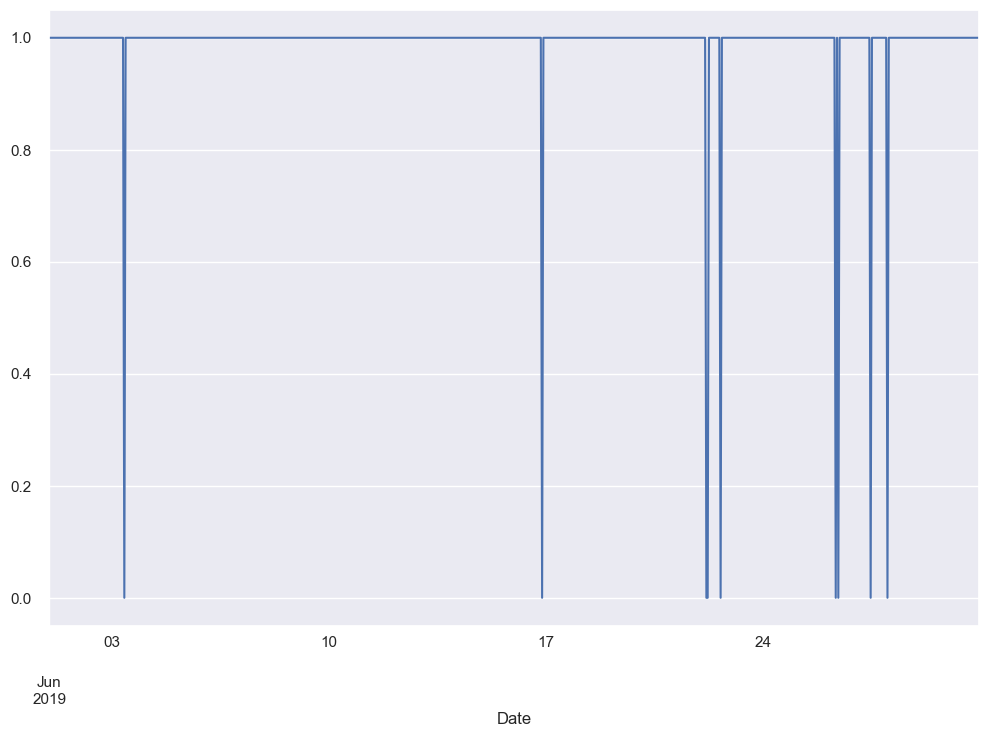

In [159]:
data.loc["2019-06", "position"].plot(figsize = (12 , 8))
plt.show()

## Strategy Backtest

In [160]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1


In [161]:
# position to take for the next bar - use shift(1)
data["strategy"] = data.position.shift(1) * data["returns"]
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy
Date,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457
...,...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1,-0.001835
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1,-0.001179
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1,-0.001824


In [162]:
data.loc["2017-08-19"]

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy
Date,,,,,,,,,
2017-08-19 00:00:00,4163.49,41.308877,0.013327,0.966269,-0.084180,5,-1,1,0.013327
2017-08-19 01:00:00,4148.53,28.835177,-0.003600,0.962797,-0.359481,-4,-3,1,-0.003600
2017-08-19 02:00:00,4156.39,18.754474,0.001893,0.964621,-0.430164,2,-4,1,0.001893
2017-08-19 03:00:00,4138.55,19.611920,-0.004301,0.960481,0.044705,-4,1,1,-0.004301
2017-08-19 04:00:00,4068.26,17.353232,-0.017130,0.944168,-0.122359,-5,-1,1,-0.017130
2017-08-19 05:00:00,4077.00,12.514194,0.002146,0.946197,-0.326915,3,-3,1,0.002146
2017-08-19 06:00:00,3986.87,51.455431,-0.022355,0.925279,1.413852,-5,5,1,-0.022355
2017-08-19 07:00:00,4033.47,31.429222,0.011621,0.936094,-0.492978,5,-4,0,0.011621
2017-08-19 08:00:00,3999.00,18.006405,-0.008583,0.928094,-0.557011,-5,-4,1,-0.000000


In [163]:
data[["returns", "strategy"]].sum().apply(np.exp) # multiple for buy-and-hold and strategy

returns      9.799252
strategy    25.030934
dtype: float64

In [164]:
# normalized price with base = 1 for strategy
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) 

In [165]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy
Date,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1,-0.001835,25.142267
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1,-0.001179,25.112637
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1,-0.001824,25.066883


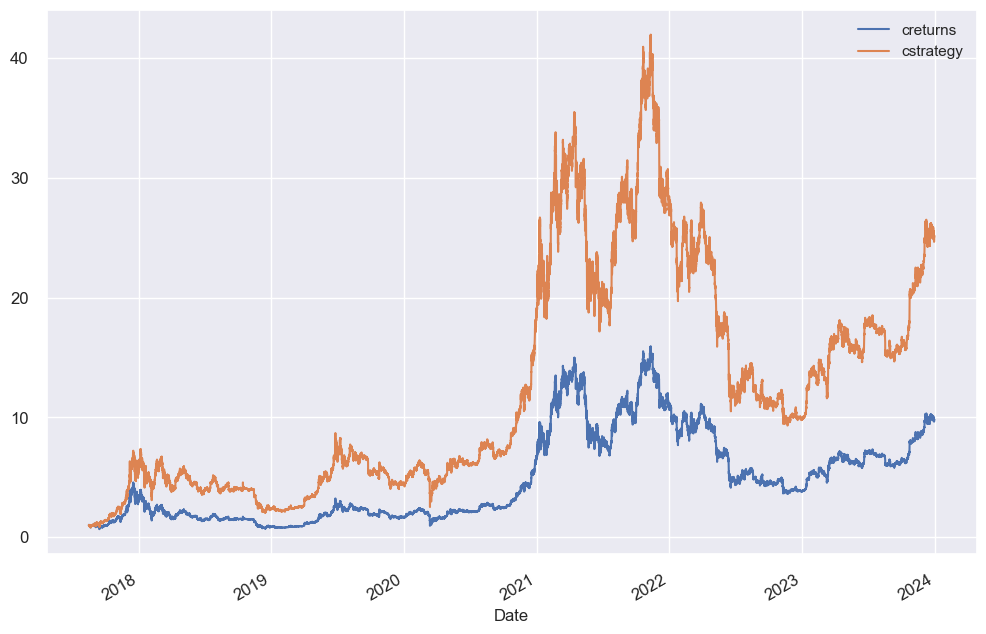

In [166]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8), fontsize = 12)
plt.show()

In [167]:
tp_year = 24 * 365.25  # 1h trading periods per year
tp_year

8766.0

In [168]:
ann_mean = data[["returns", "strategy"]].mean() * tp_year # annualized returns
ann_mean

returns     0.359096
strategy    0.506650
dtype: float64

In [169]:
ann_std = data[["returns", "strategy"]].std() * np.sqrt(tp_year) # annualized std
ann_std

returns     0.799427
strategy    0.787262
dtype: float64

In [170]:
sharpe = (np.exp(ann_mean) - 1) / ann_std
sharpe

returns     0.540431
strategy    0.837995
dtype: float64

Great, but we still ignore:
- __Trading Costs__
- __Parameter Optimization__
- __Forward Testing__ (to avoid/remove data snooping and the lookahead bias)

## Trading Costs

In [171]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy
Date,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1,-0.001835,25.142267
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1,-0.001179,25.112637
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1,-0.001824,25.066883


In [172]:
data.position.value_counts()

position
1    55174
0      541
Name: count, dtype: int64

In [173]:
data.position.diff().fillna(0).abs() # absolute change in position

Date
2017-08-17 04:00:00    0.0
2017-08-17 05:00:00    0.0
2017-08-17 06:00:00    0.0
2017-08-17 07:00:00    0.0
2017-08-17 08:00:00    0.0
                      ... 
2023-12-30 18:00:00    0.0
2023-12-30 19:00:00    0.0
2023-12-30 20:00:00    0.0
2023-12-30 21:00:00    0.0
2023-12-30 22:00:00    0.0
Name: position, Length: 55715, dtype: float64

In [174]:
data["trades"] = data.position.diff().fillna(0).abs()

In [175]:
data.trades.value_counts()

trades
0.0    54655
1.0     1060
Name: count, dtype: int64

In [176]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy,trades
Date,,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506,0.0
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1,0.002090,1.003602,0.0
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552,0.0
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1,-0.001835,25.142267,0.0
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1,-0.001179,25.112637,0.0
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1,-0.001824,25.066883,0.0


-> __718 single trades__ (from neutral to long or from long to neutral) <br>
-> each trade __triggers trading costs__, don´t ignore them!!! <br>
-> Trading Costs __must be included__ in Backtesting!!! <br>

In [177]:
commissions = 0.00075 # reduced Binance commission 0.075%
commissions

0.00075

In [178]:
other = 0.0001 # proportional costs for bid-ask spread & slippage (more detailed analysis required!)
other

0.0001

In [179]:
# total proportional trading costs (negative log return)
ptc = np.log(1 - commissions) + np.log(1 - other)
ptc

-0.0008502863910375247

In [180]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy,trades
Date,,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506,0.0
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1,0.002090,1.003602,0.0
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552,0.0
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1,-0.001835,25.142267,0.0
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1,-0.001179,25.112637,0.0
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1,-0.001824,25.066883,0.0


In [181]:
data["strategy_net"] = data.strategy + data.trades * ptc # strategy returns net of costs

In [182]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [183]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506,0.0,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,3,-5,1,0.002090,1.003602,0.0,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552,0.0,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036,0.0,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 18:00:00,42411.11,790.866750,-0.001835,9.842837,-0.833230,-2,-5,1,-0.001835,25.142267,0.0,-0.001835,10.208766
2023-12-30 19:00:00,42361.13,741.062640,-0.001179,9.831237,-0.065044,-2,-1,1,-0.001179,25.112637,0.0,-0.001179,10.196736
2023-12-30 20:00:00,42283.95,797.193820,-0.001824,9.813325,0.073013,-2,2,1,-0.001824,25.066883,0.0,-0.001824,10.178158


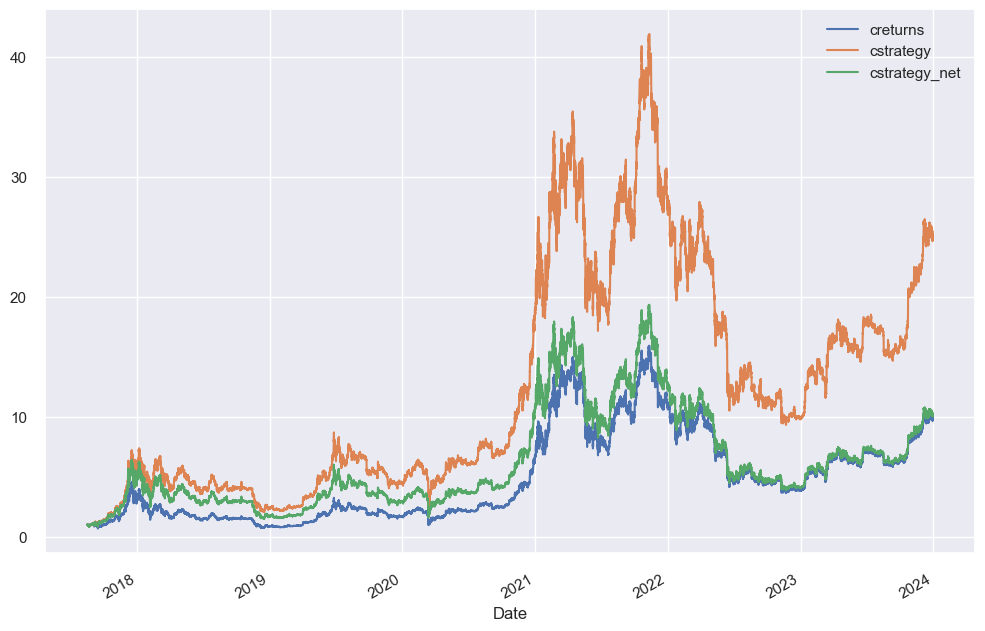

In [184]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

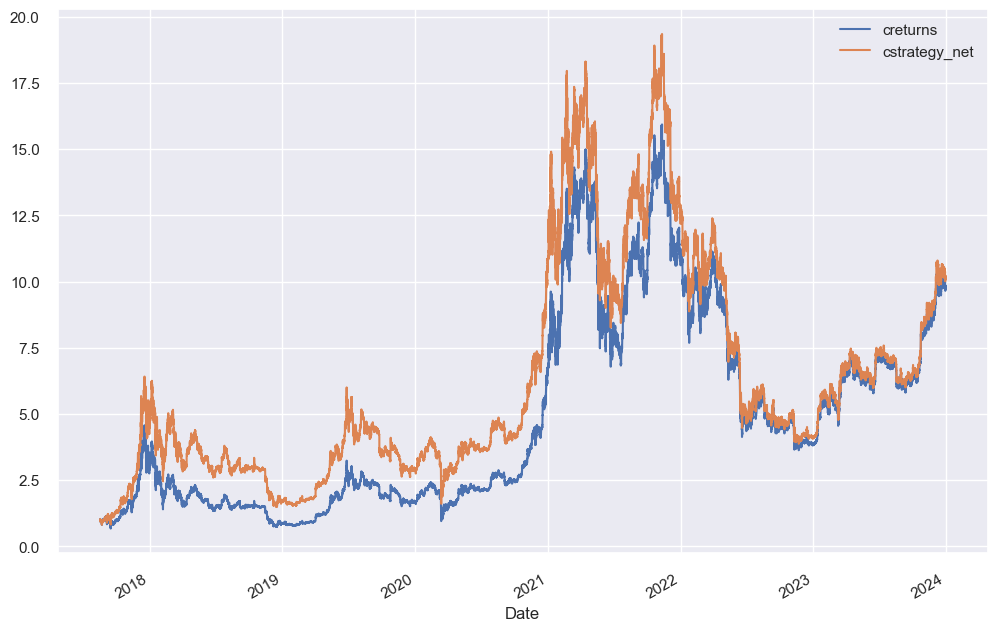

In [185]:
data[["creturns", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()